In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

(375, 499, 3) uint8 255 0
(100, 200, 3)


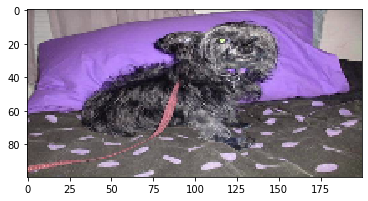

(499, 327, 3) uint8 255 0
(100, 200, 3)


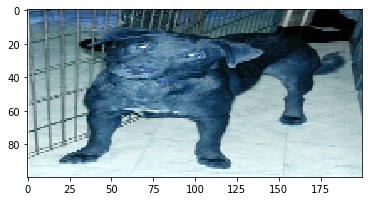

In [2]:
train_dogs_dir = 'downloads/cats_and_dogs_small/train/dogs/'
for i in range(2):
    img = cv2.imread(train_dogs_dir + 'dog.{}.jpg'.format(i))
    print(img.shape, img.dtype, img.max(), img.min())
    img = cv2.resize(img, dsize=(200, 100), interpolation=cv2.INTER_CUBIC)
    print(img.shape)
    plt.imshow(img)
    plt.show()

(374, 500, 3)
(100, 200, 3)


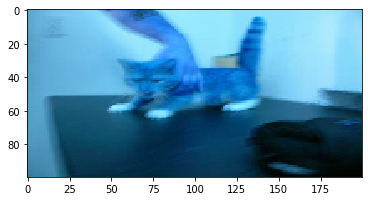

(280, 300, 3)
(100, 200, 3)


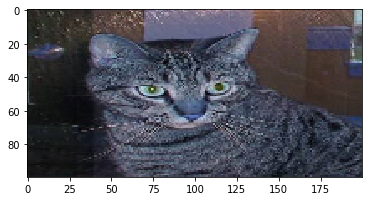

In [3]:
train_cats_dir = 'downloads/cats_and_dogs_small/train/cats/'
for i in range(2):
    img = cv2.imread(train_cats_dir + 'cat.{}.jpg'.format(i))
    print(img.shape)
    img = cv2.resize(img, dsize=(200, 100), interpolation=cv2.INTER_CUBIC)
    print(img.shape)
    plt.imshow(img)
    plt.show()

In [4]:
x_train = []
y_train = []
train_dogs_dir = 'downloads/cats_and_dogs_small/train/dogs/'
for i in range(1000):
    img = cv2.imread(train_dogs_dir + 'dog.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_train.append(img)
    y_train.append(1)
train_cats_dir = 'downloads/cats_and_dogs_small/train/cats/'
for i in range(1000):
    img = cv2.imread(train_cats_dir + 'cat.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_train.append(img)
    y_train.append(0)
x_train = np.array(x_train).astype(np.float32) / 255
y_train = np.array(y_train).astype(np.float32).reshape((-1,1))
print(x_train.shape, y_train.shape)

(2000, 150, 150, 3) (2000, 1)


In [5]:
x_validation = []
y_validation = []
validation_dogs_dir = 'downloads/cats_and_dogs_small/validation/dogs/'
for i in range(1000,1500):
    img = cv2.imread(validation_dogs_dir + 'dog.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_validation.append(img)
    y_validation.append(1)
validation_cats_dir = 'downloads/cats_and_dogs_small/validation/cats/'
for i in range(1000,1500):
    img = cv2.imread(validation_cats_dir + 'cat.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_validation.append(img)
    y_validation.append(0)
x_validation = np.array(x_validation).astype(np.float32) / 255
y_validation = np.array(y_validation).astype(np.float32).reshape((-1,1))
print(x_validation.shape, y_validation.shape)

(1000, 150, 150, 3) (1000, 1)


In [6]:
x_test = []
y_test = []
test_dogs_dir = 'downloads/cats_and_dogs_small/test/dogs/'
for i in range(1500,2000):
    img = cv2.imread(test_dogs_dir + 'dog.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_test.append(img)
    y_test.append(1)
test_cats_dir = 'downloads/cats_and_dogs_small/test/cats/'
for i in range(1500,2000):
    img = cv2.imread(test_cats_dir + 'cat.{}.jpg'.format(i))
    img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    x_test.append(img)
    y_test.append(0)
x_test = np.array(x_test).astype(np.float32) / 255
y_test = np.array(y_test).astype(np.float32).reshape((-1,1))
print(x_test.shape, y_test.shape)

(1000, 150, 150, 3) (1000, 1)


In [7]:
lr = 1e-4 
epoch = 30
batch_size = 20

In [8]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation=None))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


In [10]:
x = model.input 
logits = model.output
y = tf.placeholder(tf.float32, shape=[None,1], name='y')

y_pred = tf.cast(logits>0, tf.float32, name='y_pred') 

entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits) 
loss = tf.reduce_mean(entropy) 
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

correct = ( tf.abs(y-y_pred) < 0.1 )
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
def shuffle_batch(x, y, batch_size):
    rnd_idx = np.random.permutation(len(x))
    n_batches = len(x) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        yield x[batch_idx], y[batch_idx]

In [12]:
with tf.Session() as sess:
    init.run()
    #saver.restore(sess, 'save/nn.ckpt')
    
    loss_trace = []
    accuracy_trace = []

    for i in range(epoch):
        print()
        print('epoch {}/{}'.format(i, epoch), end=' ')
        for x_batch, y_batch in shuffle_batch(x_train, y_train, batch_size):
            feed_dict = {x: x_batch, y: y_batch}
            loss_run, accuracy_run, _ = sess.run([loss, accuracy, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
            accuracy_trace.append(accuracy_run)

    feed_dict = {x: x_test, y: y_test}
    accuracy_run, y_test_pred = sess.run([accuracy, y_pred], feed_dict=feed_dict)
    
    saver.save(sess, 'save/nn.ckpt')


epoch 0/30 
epoch 1/30 
epoch 2/30 
epoch 3/30 
epoch 4/30 
epoch 5/30 
epoch 6/30 
epoch 7/30 
epoch 8/30 
epoch 9/30 
epoch 10/30 
epoch 11/30 
epoch 12/30 
epoch 13/30 
epoch 14/30 
epoch 15/30 
epoch 16/30 
epoch 17/30 
epoch 18/30 
epoch 19/30 
epoch 20/30 
epoch 21/30 
epoch 22/30 
epoch 23/30 
epoch 24/30 
epoch 25/30 
epoch 26/30 
epoch 27/30 
epoch 28/30 
epoch 29/30 

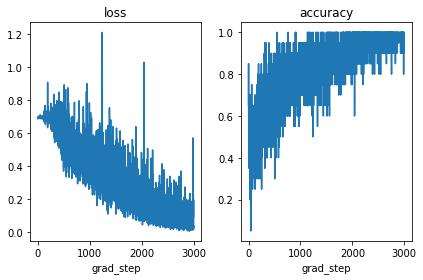

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(loss_trace)
ax2.plot(accuracy_trace)
ax1.set_title('loss')
ax2.set_title('accuracy')
ax1.set_xlabel('grad_step')
ax2.set_xlabel('grad_step')
plt.tight_layout()
plt.show()

In [14]:
print('Test Accuracy :', accuracy_run)

Test Accuracy : 0.731


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[339 161]
 [108 392]]


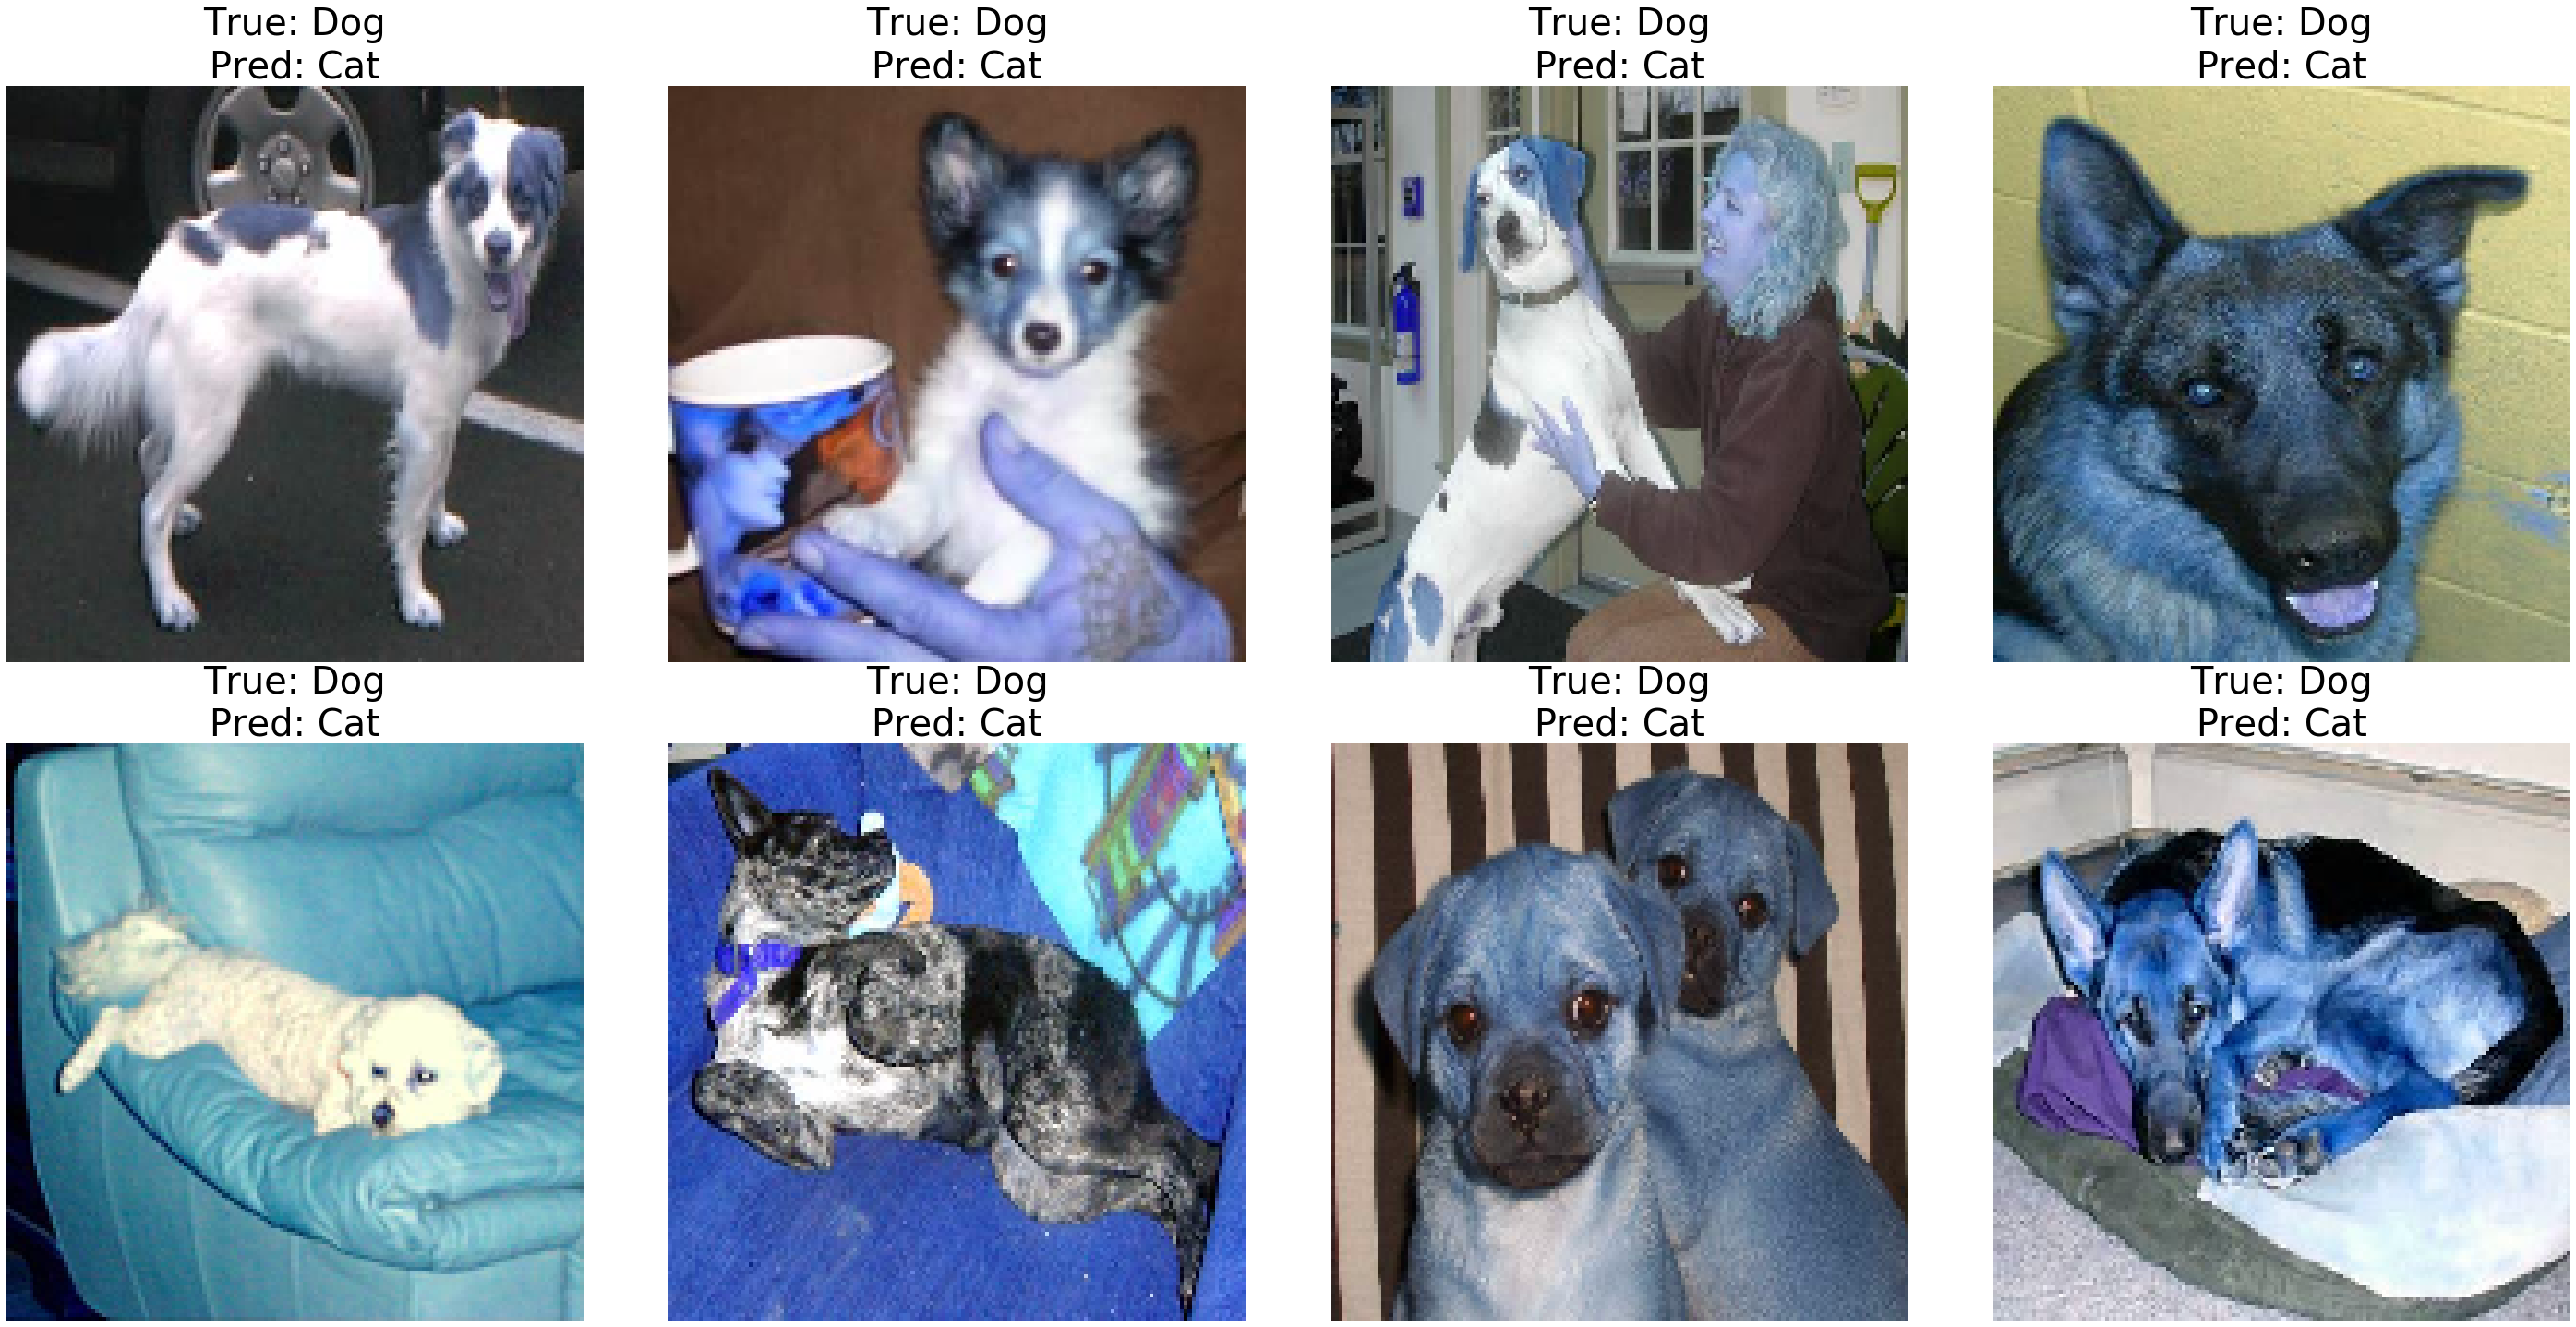

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(40,20))
idx = 0
for ax in axes.reshape((-1,)):
    while True:
        if int(y_test[idx,0])==int(y_test_pred[idx,0]):
            idx += 1
        else:
            ax.imshow((x_test[idx]*255).astype(np.int64))
            if int(y_test[idx,0]) == 1:
                true_label = 'Dog'
                pred_label = 'Cat'
            else:
                true_label = 'Cat'
                pred_label = 'Dog'   
            ax.set_title('True: {}\nPred: {}'.format(true_label, pred_label), fontsize=40)
            ax.axis('off')
            idx += 1
            break
plt.tight_layout()
plt.show()